<a href="https://colab.research.google.com/github/FabioRochaPoeta/wine-case/blob/main/An%C3%A1lise_supervisionada_Generiza%C3%A7%C3%A3o_de_Modelos_Dados_Vinho_Tinto_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vamos continuar bebendo vinho!

![](https://media.giphy.com/media/id3BT6D8EB8Ag/giphy.gif)


## Lembrando as variáveis

Usaremos um dataset composto por propriedades físico-químicas de vinhos tintos. Temos 1599 amostras e um total de 11 variáveis independentes, descritas abaixo:

 - `fixed acidity`: a maioria dos ácidos envolvidos com vinho (não evaporam prontamente)
 - `volatile acidity`: a quantidade de ácido acético no vinho, que em níveis muito altos pode levar a um gosto desagradável de vinagre
 - `citric acid`: encontrado em pequenas quantidades, o ácido cítrico pode adicionar "leveza" e sabor aos vinhos
 - `residual sugar`: a quantidade de açúcar restante após a fermentação é interrompida, é raro encontrar vinhos com menos de 1 grama / litro e vinhos com mais de 45 gramas / litro são considerados doces
 - `chlorides`: a quantidade de sal no vinho
free sulfur dioxide: a forma livre de SO2 existe em equilíbrio entre o SO2 molecular (como gás dissolvido) e o íon bissulfito; impede o crescimento microbiano e a oxidação do vinho
 - `total sulfur dioxide`: Quantidade de formas livres e encadernadas de S02; em baixas concentrações, o SO2 é quase indetectável no vinho, mas nas concentrações de SO2 acima de 50 ppm, o SO2 se torna evidente no nariz e no sabor do vinho.
 - `density`: a densidade do vinho é próxima a da água, dependendo do percentual de álcool e teor de açúcar
 - `pH`: descreve se o vinho é ácido ou básico numa escala de 0 (muito ácido) a 14 (muito básico); a maioria dos vinhos está entre 3-4 na escala de pH
 - `sulphates`: um aditivo de vinho que pode contribuir para os níveis de gás de dióxido de enxofre (S02), que age como um antimicrobiano e antioxidante
 - `alcohol`: o percentual de álcool no vinho


Existe ainda uma variável chamada `quality`. Essa variável é uma nota de qualidade do vinho que varia de 0 a 10.

Criamos uma variável que determina se um vinho é considerado bom ou ruim, baseado na quality. Se quality > 5, o vinho é bom. 

In [ ]:
config = {
    "url" : "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
    "sep" : ";",
    "test_size" : 0.3,
    "bad_wine_upper_bound" : 6
}

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay
)

sns.set_style("ticks")
sns.set_context("paper")

In [ ]:
def logit_train(X, y, test_size : float = 0.2, random_state=42, stratify=None, **logit_kwargs):
    """
    Method for training a model using logit regression.
    """
    random.seed(random_state) # "GLOBAL"/ LOCAL
    np.random.seed(random_state)

    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=test_size,
                                                        random_state=random_state, # LOCAL
                                                        stratify=stratify)
    scaler = StandardScaler() # LOCAL
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = LogisticRegression(**logit_kwargs, random_state=random_state)
    model.fit(X_train_scaled, y_train)

    return {
        'model': model,
        'scaler': scaler,
        'X_train': X_train,
        'X_train_scaled': X_train_scaled,
        'X_test': X_test,
        'X_test_scaled': X_test_scaled,
        'y_train': y_train,
        'y_test': y_test
    }

class LogitTrainResults:
    def __init__(self, results):
        self.model = results['model']
        self.scaler = results['scaler']
        self.X_train = results['X_train']
        self.X_train_scaled = results['X_train_scaled']
        self.X_test = results['X_test']
        self.X_test_scaled = results['X_test_scaled']
        self.y_train = results['y_train']
        self.y_test = results['y_test']

    def accuracy_train(self):
        y_pred = self.model.predict(self.X_train_scaled)
        return accuracy_score(self.y_train, y_pred)

    def accuracy_test(self):
        y_pred = self.model.predict(self.X_test_scaled)
        return accuracy_score(self.y_test, y_pred)

    def plot_roc(self, X, y, estimator_name : str = "treino", **kwargs):
        y_hat = self.model.predict_proba(X)
        fpr, tpr, thresholds = roc_curve(y, y_hat[:, 1], pos_label=1)
        auc_score = auc(fpr, tpr)

        return RocCurveDisplay(fpr=fpr,
                               tpr=tpr,
                               roc_auc=auc_score,
                               estimator_name = estimator_name).plot(**kwargs)

    def plot_roc_train(self, **kwargs):
        self.plot_roc(self.X_train_scaled, self.y_train, estimator_name="treino", **kwargs)

    def plot_roc_test(self, **kwargs):
        self.plot_roc(self.X_test_scaled, self.y_test, estimator_name="teste", **kwargs)

In [ ]:
CHART_SIZE = (6, 6)

In [ ]:
# config.py

# Ler caminhos de pastas
# Importar dependências (json)
# Injetar dependências

url = config["url"]
sep = config["sep"]
test_size = config["test_size"]
bad_wine_upper_bound = config["bad_wine_upper_bound"]

In [ ]:
# main.py > Aqui começa o "programa/procedure"
wine = pd.read_csv(url,
                   sep=sep)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
print(f"Número de Observações: {wine.shape[0]}")

Número de Observações: 1599


<Axes: >

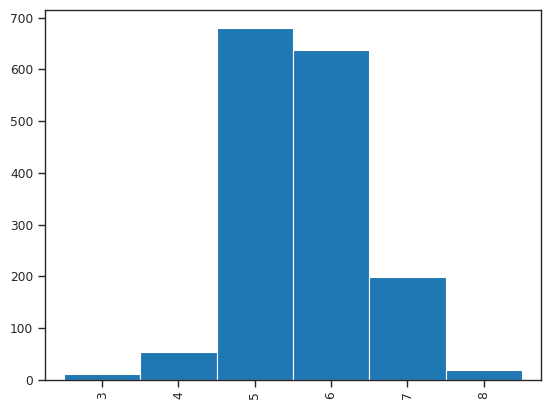

In [ ]:
wine.quality.value_counts().sort_index().plot.bar(width=1)

In [ ]:
wine.quality.mean()

5.6360225140712945

In [ ]:
number_of_wines = wine.shape[0]
wine["category"] = (wine.quality > bad_wine_upper_bound).astype(float) # DISCRETE wine.quality -> BOOLEAN category

In [ ]:
vars = [
   'fixed acidity',
   'volatile acidity',
   'citric acid',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'density',
   'pH',
   'sulphates',
   'alcohol',
]

In [ ]:
wine[vars]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Criando funções para treinar o modelo


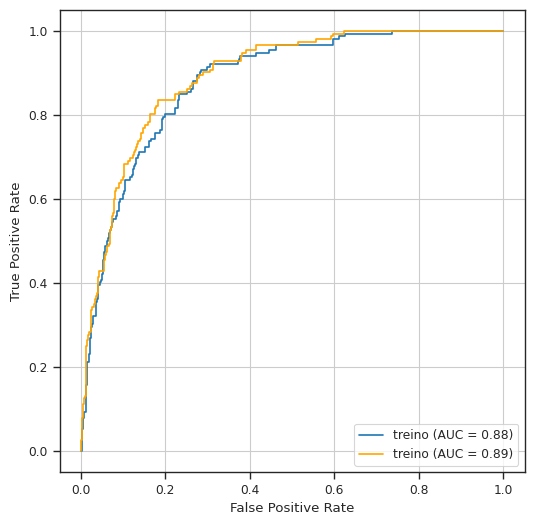

In [ ]:
X = wine[vars]
y = wine['category'] 
stratify = y

result_1 = LogitTrainResults(logit_train(X, y, test_size, stratify=stratify, random_state=42, max_iter=100000))
result_2 = LogitTrainResults(logit_train(X, y, test_size, stratify=stratify, random_state=171, max_iter=100000))


fig, ax = plt.subplots(1, 1, figsize=CHART_SIZE)
result_1.plot_roc_train(ax=ax)
result_2.plot_roc_train(ax=ax, color='orange')
ax.grid()

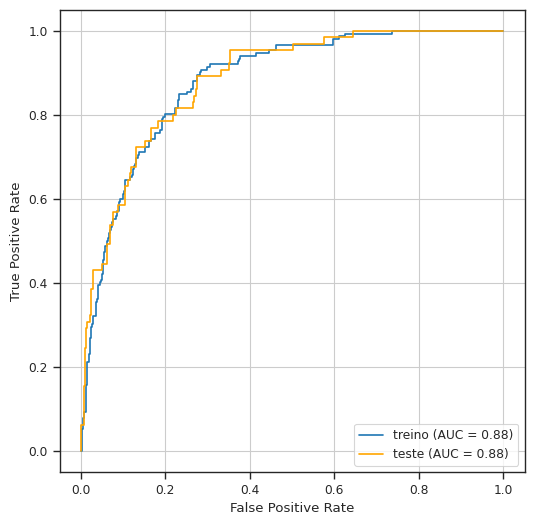

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=CHART_SIZE)

result_1.plot_roc_train(ax=ax)
result_1.plot_roc_test(ax=ax, color='orange')
ax.grid()

# Usar validação cruzada

In [ ]:
X = wine[vars]
y = wine['category'] 
stratify = y
random_state = 42
test_size = 0.1

X_train_cv, X_test, y_train_cv, y_test = train_test_split(X.values,
                                                          y.values,
                                                          test_size=test_size,
                                                          random_state=random_state,
                                                          stratify=stratify)

In [ ]:
from sklearn.model_selection import StratifiedKFold




def interpolation(fpr, tpr):
    interp_fpr = np.linspace(0, 1, 100)
    interp_tpr = np.interp(interp_fpr, fpr, tpr)
    interp_tpr[0] = 0.
    return interp_fpr, interp_tpr

def train_cv(model, cv):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    fprs_list = []
    tprs_list = []
    auc_list  = []
    scaler_list = []
    for fold, (train, val) in enumerate(cv.split(X_train_cv, y_train_cv)):
        X_train = X_train_cv[train, :]
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        scaler_list.append(scaler)
        y_train = y_train_cv[train]
        X_val = X_train_cv[val, :]
        X_val_scaled = scaler.transform(X_val)
        y_val = y_train_cv[val]

        model.fit(X_train_scaled, y_train)

        viz = RocCurveDisplay.from_estimator(
            model,
            X_val_scaled,
            y_val,
            ax = ax,
            alpha=0.3,
            lw=1
        )
        interp_fpr, interp_tpr = interpolation(viz.fpr, viz.tpr)
        fprs_list.append(interp_fpr)
        tprs_list.append(interp_tpr)
        auc_list.append(viz.roc_auc) 

    mean_fpr = np.mean(fprs_list, axis=0)
    mean_tpr = np.mean(tprs_list, axis=0)
    mean_auc = np.mean(auc_list)
    std_auc = np.std(auc_list)

    ax.plot(
        mean_fpr,
        mean_tpr,
        color='blue',
        lw=2,
        label=r"Mean ROC (AUC = %.2f $\pm$ %.2f)" %(mean_auc, std_auc)
    )


    ax.plot(np.linspace(0, 1, 100),
            np.linspace(0, 1, 100),
            color='g',
            ls=":",
            lw=0.5)
    ax.legend()

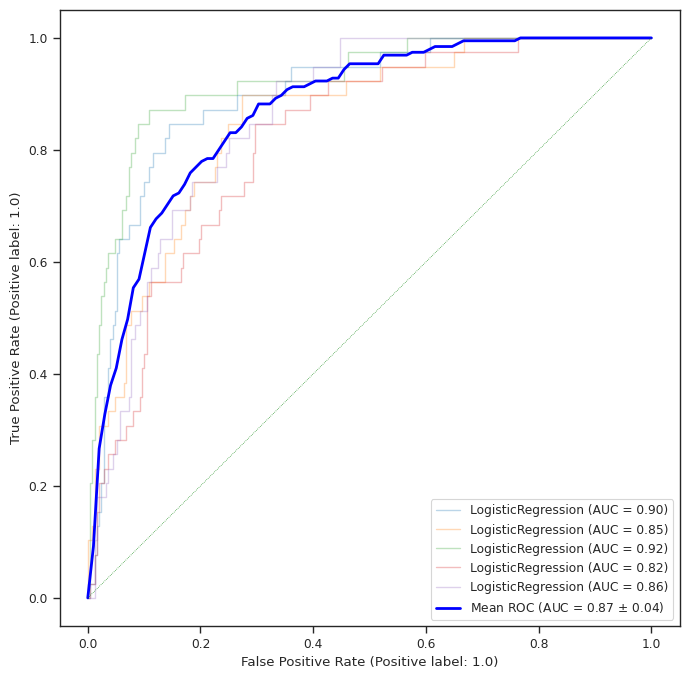

In [ ]:

cv = StratifiedKFold(n_splits=5)
model_1 = LogisticRegression(max_iter=10000, random_state=random_state)
train_cv(model_1, cv)

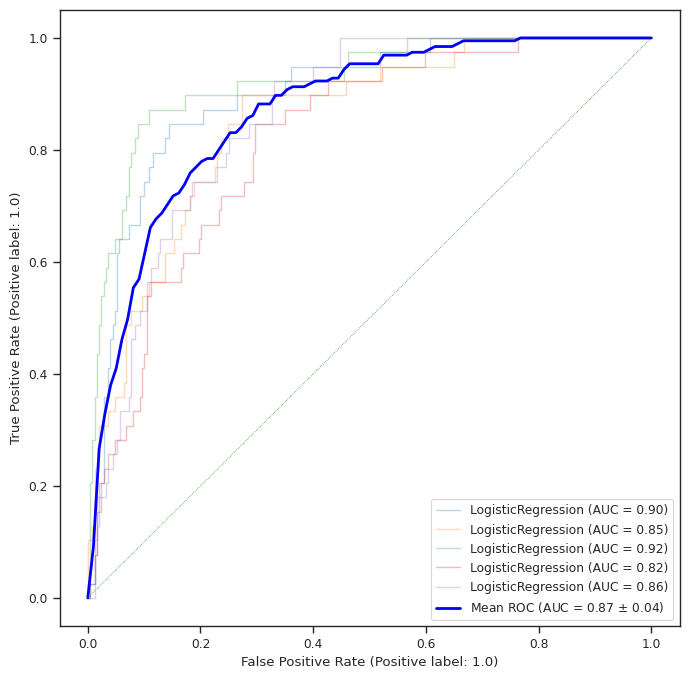

In [ ]:
model_2 = LogisticRegression(max_iter=10000, solver="saga", random_state=random_state)
train_cv(model_2, cv)

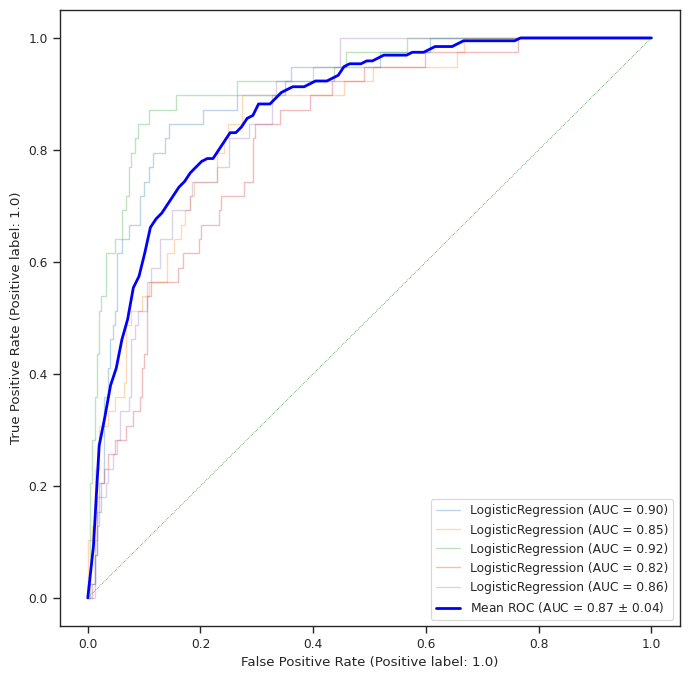

In [ ]:
model_3 = LogisticRegression(max_iter=10000, solver="liblinear", random_state=random_state)
train_cv(model_3, cv)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


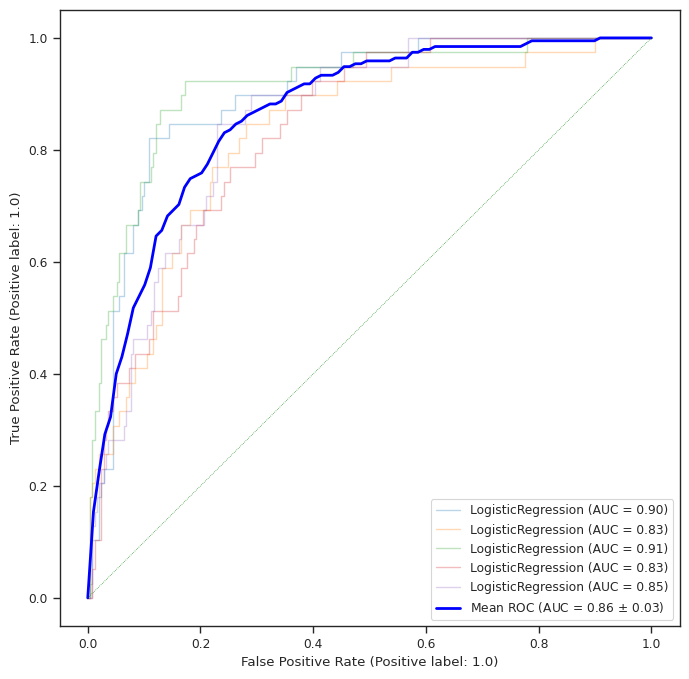

In [ ]:
model_4 = LogisticRegression(max_iter=1, solver="liblinear", penalty="l1", random_state=random_state)
train_cv(model_4, cv)